In [2]:
import os
import numpy as np

Creating an Image loader

In [3]:

def load_img(img_dir, img_list):
    images = []
    for i, image_name in enumerate(img_list):
        if(image_name.split('.')[1]=='npy'):
            image = np.load(img_dir+image_name)
            
            images.append(image)
    images = np.array(images)
    return(images)



Creating the Data Generator

In [4]:


def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    L = len(img_list)
    
    #Keras needs the generator to be infinite for working, so we take while true
    while True:
        batch_start = 0
        batch_end = batch_size
        
        while batch_start<L:
            limit = min(batch_end, L)
            
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])
            
            yield (X,Y) #a tuple with two numpy arrays with batchsize samples
            
            batch_start += batch_size
            batch_end += batch_size
            
            

Testing the Generator

In [5]:
from matplotlib import pyplot as plt
import random

In [6]:
train_img_dir = "BraTS2020_TrainingData\\input_data_3channels\\images\\"
train_mask_dir = "BraTS2020_TrainingData\\input_data_3channels\\masks\\"

train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

# print(train_img_list)
# print(train_mask_list)

In [7]:
train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

In [8]:
Verify generator
img, mask = train_img_datagen.__next__()

In [9]:
print(img.shape)#gives 2 images of dimensions 128*128*128*3
print(mask.shape)#gives 2 masks of dimensions 128*128*128*4

(2, 128, 128, 128, 3)
(2, 128, 128, 128, 4)


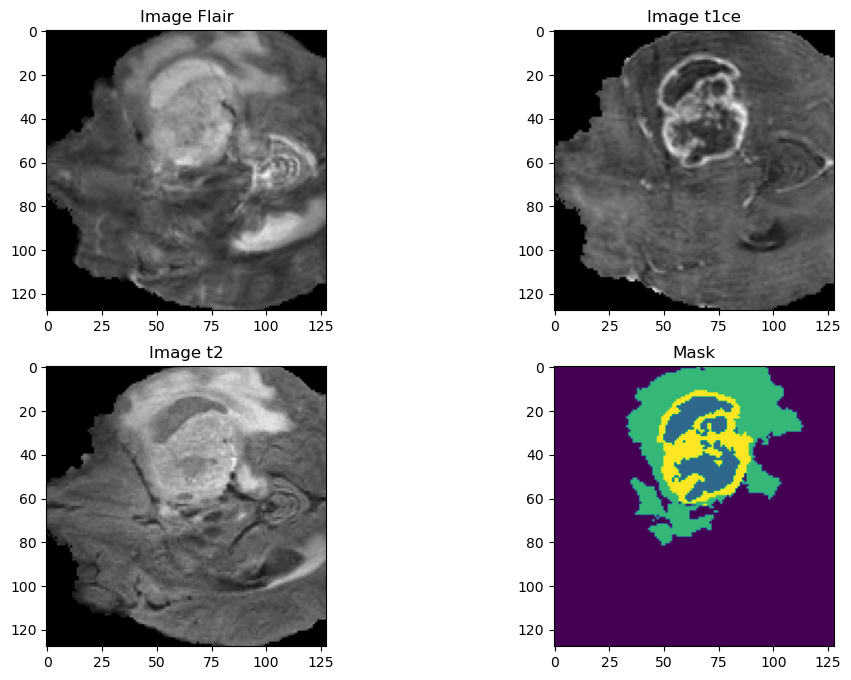

In [12]:
img_num = random.randint(0,img.shape[0]-1)#Randomly selecting an image number from 2 images
test_img = img[img_num]
test_mask = mask[img_num]
test_mask = np.argmax(test_mask,axis = 3)

n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0],cmap = 'gray')
plt.title("Image Flair")
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1],cmap = 'gray')
plt.title("Image t1ce")
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2],cmap = 'gray')
plt.title("Image t2")
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title("Mask")
plt.show()